In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Function to load data from Excel files
def load_data(file_path):
    
    return pd.read_excel(file_path)

# Function to train linear regression model
def train_linear_regression(X_train, y_train):
   
    reg = LinearRegression().fit(X_train, y_train)
    y_train_pred = reg.predict(X_train)
    return reg, y_train_pred

# Function to evaluate the regression model
def evaluate_model(y_train, y_train_pred):
    
    mse = mean_squared_error(y_train, y_train_pred)
    r2 = r2_score(y_train, y_train_pred)
    return {"Mean Squared Error": mse, "R2 Score": r2}

# Main program
def main():
    # Load both datasets
    extractive_embeddings = load_data("C:/Users/nagas/Downloads/English_Extractive_Embeddings_Fasttext.xlsx")
    abstractive_embeddings = load_data("C:/Users/nagas/Downloads/English_Abstractive_Embeddings_Fasttext.xlsx")

    # For both datasets, we will select one feature and a target
    # Selecting the first column as X_train and the last column as y_train
    
    # Dataset 1: Extractive Embeddings
    X_train_extractive = extractive_embeddings.iloc[:, [0]]  # First column as feature
    y_train_extractive = extractive_embeddings.iloc[:, -1]   # Last column as target

    # Train the model on extractive embeddings dataset
    model_extractive, y_train_pred_extractive = train_linear_regression(X_train_extractive, y_train_extractive)
    performance_extractive = evaluate_model(y_train_extractive, y_train_pred_extractive)

    # Dataset 2: Abstractive Embeddings
    X_train_abstractive = abstractive_embeddings.iloc[:, [0]]  # First column as feature
    y_train_abstractive = abstractive_embeddings.iloc[:, -1]   # Last column as target

    # Train the model on abstractive embeddings dataset
    model_abstractive, y_train_pred_abstractive = train_linear_regression(X_train_abstractive, y_train_abstractive)
    performance_abstractive = evaluate_model(y_train_abstractive, y_train_pred_abstractive)

    # Display results
    print("Performance Metrics for Extractive Embeddings Dataset:")
    for metric, value in performance_extractive.items():
        print(f"{metric}: {value}")

    print("\nPerformance Metrics for Abstractive Embeddings Dataset:")
    for metric, value in performance_abstractive.items():
        print(f"{metric}: {value}")

if __name__ == "__main__":
    main()


Performance Metrics for Extractive Embeddings Dataset:
Mean Squared Error: 1.1763640333645848
R2 Score: 0.001492365413769292

Performance Metrics for Abstractive Embeddings Dataset:
Mean Squared Error: 1.1689687585875486
R2 Score: 0.007769536523475562


In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
import numpy as np

# Function to load data from Excel files
def load_data(file_path):
  
    return pd.read_excel(file_path)

# Function to train linear regression model
def train_linear_regression(X_train, y_train):
  
    reg = LinearRegression().fit(X_train, y_train)
    y_train_pred = reg.predict(X_train)
    return reg, y_train_pred

# Function to calculate evaluation metrics
def calculate_metrics(y_true, y_pred):
   
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    return {
        "Mean Squared Error": mse,
        "Root Mean Squared Error": rmse,
        "Mean Absolute Percentage Error": mape,
        "R2 Score": r2
    }

# Main program to include train-test split and metric comparison for both datasets
def main():
    # Load both datasets
    extractive_embeddings = load_data("C:/Users/nagas/Downloads/English_Extractive_Embeddings_Fasttext.xlsx")
    abstractive_embeddings = load_data("C:/Users/nagas/Downloads/English_Abstractive_Embeddings_Fasttext.xlsx")


    datasets = {
        "Extractive Embeddings": extractive_embeddings,
        "Abstractive Embeddings": abstractive_embeddings
    }

    # Loop through both datasets and perform training, prediction, and evaluation
    for dataset_name, data in datasets.items():
        print(f"--- Results for {dataset_name} Dataset ---")
        
        # Selecting the first column as X and the last column as y
        X = data.iloc[:, [0]]  # First column as feature
        y = data.iloc[:, -1]   # Last column as target
        
        # Split the data into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train the model
        model, y_train_pred = train_linear_regression(X_train, y_train)
        
        # Perform predictions on the test set
        y_test_pred = model.predict(X_test)

        # Calculate metrics for both train and test sets
        train_metrics = calculate_metrics(y_train, y_train_pred)
        test_metrics = calculate_metrics(y_test, y_test_pred)

        # Display results for the current dataset
        print("Performance Metrics - Training Set:")
        for metric, value in train_metrics.items():
            print(f"{metric}: {value}")

        print("\nPerformance Metrics - Test Set:")
        for metric, value in test_metrics.items():
            print(f"{metric}: {value}")

        print("\n" + "="*50 + "\n")

if __name__ == "__main__":
    main()


--- Results for Extractive Embeddings Dataset ---
Performance Metrics - Training Set:
Mean Squared Error: 1.1604706701524496
Root Mean Squared Error: 1.0772514423998
Mean Absolute Percentage Error: 1523238025650646.5
R2 Score: 0.0014436773250406931

Performance Metrics - Test Set:
Mean Squared Error: 1.243131814888487
Root Mean Squared Error: 1.114958212171419
Mean Absolute Percentage Error: 1836346160964635.2
R2 Score: -0.010733337157371903


--- Results for Abstractive Embeddings Dataset ---
Performance Metrics - Training Set:
Mean Squared Error: 1.1500777552601595
Root Mean Squared Error: 1.0724167824405582
Mean Absolute Percentage Error: 1511785678675504.5
R2 Score: 0.010386523657689328

Performance Metrics - Test Set:
Mean Squared Error: 1.2482242106677874
Root Mean Squared Error: 1.1172395493661096
Mean Absolute Percentage Error: 1855107531405271.5
R2 Score: -0.014873730089556725




In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
import numpy as np

# Function to load data from Excel files
def load_data(file_path):
    
    return pd.read_excel(file_path)

# Function to train linear regression model
def train_linear_regression(X_train, y_train):
   
    reg = LinearRegression().fit(X_train, y_train)
    y_train_pred = reg.predict(X_train)
    return reg, y_train_pred

# Function to calculate evaluation metrics
def calculate_metrics(y_true, y_pred):
    
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    return {
        "Mean Squared Error": mse,
        "Root Mean Squared Error": rmse,
        "Mean Absolute Percentage Error": mape,
        "R2 Score": r2
    }

# Main program to include train-test split and metric comparison for both datasets using all attributes
def main():
    # Load both datasets
    extractive_embeddings = load_data("C:/Users/nagas/Downloads/English_Extractive_Embeddings_Fasttext.xlsx")
    abstractive_embeddings = load_data("C:/Users/nagas/Downloads/English_Abstractive_Embeddings_Fasttext.xlsx")

    datasets = {
        "Extractive Embeddings": extractive_embeddings,
        "Abstractive Embeddings": abstractive_embeddings
    }

    # Loop through both datasets and perform training, prediction, and evaluation using all attributes
    for dataset_name, data in datasets.items():
        print(f"--- Results for {dataset_name} Dataset ---")
        
        # Selecting all columns except the last one as X and the last column as y
        X = data.iloc[:, :-1]  # All columns except the last one as features
        y = data.iloc[:, -1]   # Last column as target
        
        # Split the data into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train the model using all attributes
        model, y_train_pred = train_linear_regression(X_train, y_train)
        
        # Perform predictions on the test set
        y_test_pred = model.predict(X_test)

        # Calculate metrics for both train and test sets
        train_metrics = calculate_metrics(y_train, y_train_pred)
        test_metrics = calculate_metrics(y_test, y_test_pred)

        # Display results for the current dataset
        print("Performance Metrics - Training Set:")
        for metric, value in train_metrics.items():
            print(f"{metric}: {value}")

        print("\nPerformance Metrics - Test Set:")
        for metric, value in test_metrics.items():
            print(f"{metric}: {value}")

        print("\n" + "="*50 + "\n")

if __name__ == "__main__":
    main()


--- Results for Extractive Embeddings Dataset ---
Performance Metrics - Training Set:
Mean Squared Error: 0.7103202086656033
Root Mean Squared Error: 0.8428049647846193
Mean Absolute Percentage Error: 893915678890811.9
R2 Score: 0.3887870208786446

Performance Metrics - Test Set:
Mean Squared Error: 3.4522915397370935
Root Mean Squared Error: 1.8580343214637058
Mean Absolute Percentage Error: 2153102709033828.8
R2 Score: -1.8068995636730927


--- Results for Abstractive Embeddings Dataset ---
Performance Metrics - Training Set:
Mean Squared Error: 0.7641706942488963
Root Mean Squared Error: 0.8741685731304325
Mean Absolute Percentage Error: 1005222913400723.1
R2 Score: 0.3424500093182835

Performance Metrics - Test Set:
Mean Squared Error: 6.459751327289772e+21
Root Mean Squared Error: 80372578204.81915
Mean Absolute Percentage Error: 4.964748189205674e+25
R2 Score: -5.252126876685264e+21




In [4]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

import os
# Function to load data from Excel files
def load_data(file_path):
    
    return pd.read_excel(file_path)

# Main program to perform K-means clustering and evaluate clustering quality on both datasets
def main():
    # Load both datasets
    extractive_embeddings = load_data("C:/Users/nagas/Downloads/English_Extractive_Embeddings_Fasttext.xlsx")
    abstractive_embeddings = load_data("C:/Users/nagas/Downloads/English_Abstractive_Embeddings_Fasttext.xlsx")

    datasets = {
        "Extractive Embeddings": extractive_embeddings,
        "Abstractive Embeddings": abstractive_embeddings
    }

    # Loop through both datasets and perform K-means clustering and evaluation
    for dataset_name, data in datasets.items():
        print(f"--- K-Means Clustering for {dataset_name} Dataset ---")
        
        # Selecting all columns except the last one (ignoring the target variable)
        X = data.iloc[:, :-1]  # All columns except the last one as features
        
        # Perform K-means clustering with k=2
        kmeans = KMeans(n_clusters=2, random_state=0, n_init=10).fit(X)
        
        # Get cluster labels
        labels = kmeans.labels_
        
        # Calculate clustering evaluation metrics
        silhouette_avg = silhouette_score(X, labels)
        calinski_harabasz = calinski_harabasz_score(X, labels)
        davies_bouldin = davies_bouldin_score(X, labels)

        # Output the clustering results and metrics
        print(f"Cluster Labels: {labels}")
        print(f"Silhouette Score: {silhouette_avg}")
        print(f"Calinski-Harabasz Index: {calinski_harabasz}")
        print(f"Davies-Bouldin Index: {davies_bouldin}")
        print("\n" + "="*50 + "\n")



# Set the number of threads to 3 to avoid the memory leak
os.environ["OMP_NUM_THREADS"] = "3"

# Now run your main script
if __name__ == "__main__":
    main()



--- K-Means Clustering for Extractive Embeddings Dataset ---
Cluster Labels: [0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0
 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 0
 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1
 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1
 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 1 0
 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0
 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0
 1 0 1 0 1 0 1 0 0 0 0 

In [5]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import os

# Set the number of threads to avoid the memory leak on Windows with MKL
os.environ["OMP_NUM_THREADS"] = "3"

# Function to load data from Excel files
def load_data(file_path):
    
    return pd.read_excel(file_path)

# Main program to perform K-means clustering and evaluate clustering quality on both datasets
def main():
    # Load both datasets
    extractive_embeddings = load_data("C:/Users/nagas/Downloads/English_Extractive_Embeddings_Fasttext.xlsx")
    abstractive_embeddings = load_data("C:/Users/nagas/Downloads/English_Abstractive_Embeddings_Fasttext.xlsx")

    datasets = {
        "Extractive Embeddings": extractive_embeddings,
        "Abstractive Embeddings": abstractive_embeddings
    }

    # Loop through both datasets and perform K-means clustering and evaluation
    for dataset_name, data in datasets.items():
        print(f"--- K-Means Clustering for {dataset_name} Dataset ---")
        
        # Selecting all columns except the last one (ignoring the target variable)
        X = data.iloc[:, :-1]  # All columns except the last one as features
        
        # Perform K-means clustering with k=2
        kmeans = KMeans(n_clusters=2, random_state=42, n_init=10).fit(X)
        
        # Get cluster labels
        labels = kmeans.labels_
        
        # Calculate clustering evaluation metrics
        silhouette_avg = silhouette_score(X, labels)
        calinski_harabasz = calinski_harabasz_score(X, labels)
        davies_bouldin = davies_bouldin_score(X, labels)

        # Output the clustering results and metrics
        print(f"Cluster Labels: {labels}")
        print(f"Silhouette Score: {silhouette_avg}")
        print(f"Calinski-Harabasz Index: {calinski_harabasz}")
        print(f"Davies-Bouldin Index: {davies_bouldin}")
        print("\n" + "="*50 + "\n")

if __name__ == "__main__":
    main()


--- K-Means Clustering for Extractive Embeddings Dataset ---
Cluster Labels: [0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0
 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 0
 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1
 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0
 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1
 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 1 0
 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0
 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0
 1 0 1 0 1 0 1 0 0 0 0 

--- K-Means Clustering for Extractive Embeddings Dataset ---


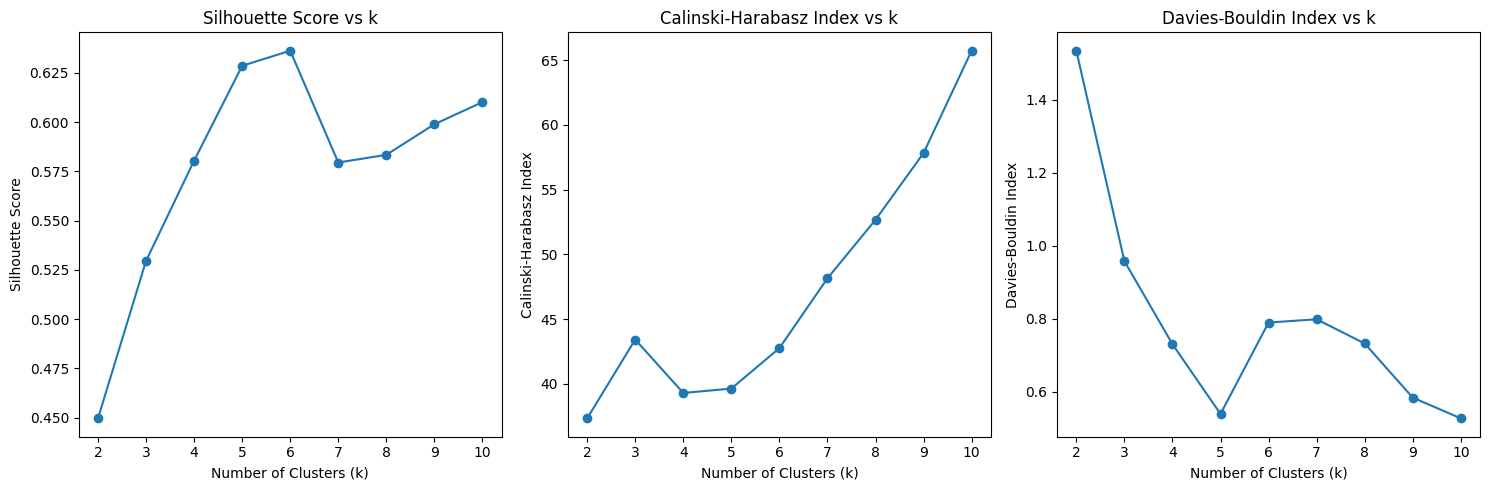

--- K-Means Clustering for Abstractive Embeddings Dataset ---


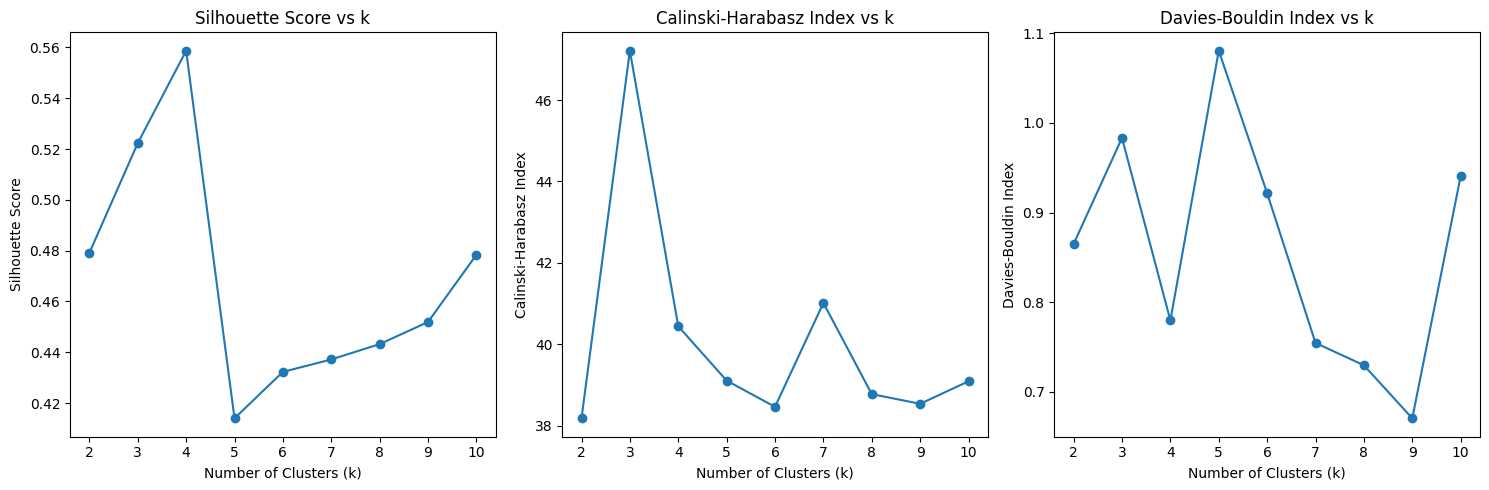

In [6]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Function to perform K-means clustering and calculate evaluation metrics for different values of k
def evaluate_k_means(data, max_k=10, sample_size=None):
   
    if sample_size:
        data = data.sample(n=sample_size, random_state=42)
    
    silhouette_scores = []
    calinski_harabasz_scores = []
    davies_bouldin_scores = []
    k_values = list(range(2, max_k + 1))
    
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(data)
        labels = kmeans.labels_
        
        # Calculate evaluation metrics
        silhouette_avg = silhouette_score(data, labels)
        calinski_harabasz = calinski_harabasz_score(data, labels)
        davies_bouldin = davies_bouldin_score(data, labels)
        
        silhouette_scores.append(silhouette_avg)
        calinski_harabasz_scores.append(calinski_harabasz)
        davies_bouldin_scores.append(davies_bouldin)
    
    return {
        "k_values": k_values,
        "silhouette_scores": silhouette_scores,
        "calinski_harabasz_scores": calinski_harabasz_scores,
        "davies_bouldin_scores": davies_bouldin_scores
    }

# Function to plot the evaluation metrics against k values
def plot_metrics(metrics):
    
    k_values = metrics["k_values"]
    
    plt.figure(figsize=(15, 5))
    
    # Plot Silhouette Score
    plt.subplot(1, 3, 1)
    plt.plot(k_values, metrics["silhouette_scores"], marker='o')
    plt.title('Silhouette Score vs k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    
    # Plot Calinski-Harabasz Index
    plt.subplot(1, 3, 2)
    plt.plot(k_values, metrics["calinski_harabasz_scores"], marker='o')
    plt.title('Calinski-Harabasz Index vs k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Calinski-Harabasz Index')
    
    # Plot Davies-Bouldin Index
    plt.subplot(1, 3, 3)
    plt.plot(k_values, metrics["davies_bouldin_scores"], marker='o')
    plt.title('Davies-Bouldin Index vs k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Davies-Bouldin Index')
    
    plt.tight_layout()
    plt.show()

# Main program to perform K-means clustering with different k values and plot the results
def main():
    # Load both datasets
    extractive_embeddings = load_data("C:/Users/nagas/Downloads/English_Extractive_Embeddings_Fasttext.xlsx")
    abstractive_embeddings = load_data("C:/Users/nagas/Downloads/English_Abstractive_Embeddings_Fasttext.xlsx")

    datasets = {
        "Extractive Embeddings": extractive_embeddings,
        "Abstractive Embeddings": abstractive_embeddings
    }

    for dataset_name, data in datasets.items():
        print(f"--- K-Means Clustering for {dataset_name} Dataset ---")
        
        # Selecting all columns except the last one (ignoring the target variable)
        X = data.iloc[:, :-1]  # All columns except the last one as features
        
        # Perform K-means clustering for different k values and evaluate the metrics (with sampling)
        metrics = evaluate_k_means(X, max_k=10, sample_size=100)  # Adjust sample_size as needed
        
        # Plot the metrics
        plot_metrics(metrics)

if __name__ == "__main__":
    main()


--- Elbow Plot for Extractive Embeddings Dataset ---


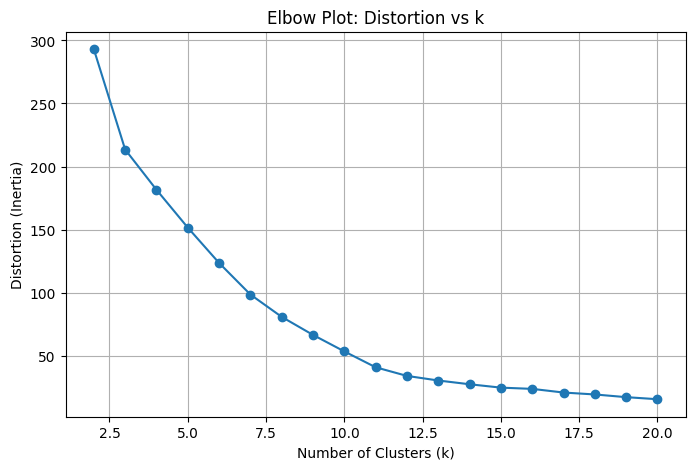

--- Elbow Plot for Abstractive Embeddings Dataset ---


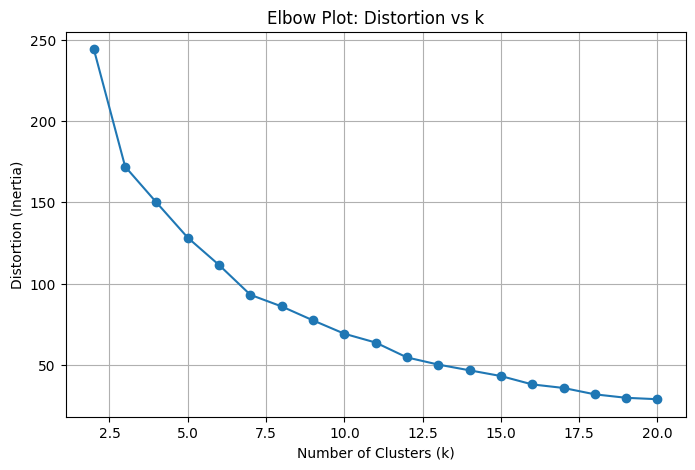

In [7]:
# Function to perform K-means clustering and calculate the distortion (inertia) for different values of k
def calculate_distortions(data, max_k=20, sample_size=None):
    
    if sample_size:
        data = data.sample(n=sample_size, random_state=42)
    
    distortions = []
    k_values = list(range(2, max_k + 1))
    
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(data)
        distortions.append(kmeans.inertia_)
    
    return k_values, distortions

# Function to plot the elbow curve
def plot_elbow_curve(k_values, distortions):
    
    plt.figure(figsize=(8, 5))
    plt.plot(k_values, distortions, marker='o')
    plt.title('Elbow Plot: Distortion vs k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Distortion (Inertia)')
    plt.grid(True)
    plt.show()

# Main program to perform K-means clustering with different k values and plot the elbow curve
def main():
    # Load both datasets
    extractive_embeddings = load_data("C:/Users/nagas/Downloads/English_Extractive_Embeddings_Fasttext.xlsx")
    abstractive_embeddings = load_data("C:/Users/nagas/Downloads/English_Abstractive_Embeddings_Fasttext.xlsx")


    datasets = {
        "Extractive Embeddings": extractive_embeddings,
        "Abstractive Embeddings": abstractive_embeddings
    }

    for dataset_name, data in datasets.items():
        print(f"--- Elbow Plot for {dataset_name} Dataset ---")
        
        # Selecting all columns except the last one (ignoring the target variable)
        X = data.iloc[:, :-1]  # All columns except the last one as features
        
        # Calculate distortions for different k values
        k_values, distortions = calculate_distortions(X, max_k=20, sample_size=100)  # Adjust sample_size as needed
        
        # Plot the elbow curve
        plot_elbow_curve(k_values, distortions)

if __name__ == "__main__":
    main()
